### Initialization

##### <div style="color: lightblue; font-size: 22px;"> 1. Import all necessary libraries. </br> &nbsp;&nbsp;&nbsp;&nbsp;LogisticRegression, Decision Tree classifier, Random Forest, RFE and PCA packages etc

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

# Set custom display properties in pandas
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 900) 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# %pip install fast_ml    ## Required for constant feature identification package
# %conda install lightgbm -y

import xgboost as xgb
import statsmodels.api as sm
from lightgbm import LGBMClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.decomposition import PCA, IncrementalPCA 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, f1_score, classification_report, accuracy_score

##### <div style="color: lightblue; font-size: 22px;"> 2. Initialize the telecom_churn dataset

In [3]:
telecom_df = pd.read_csv("./telecom_churn_data.csv")
telecom_df.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,NaN,0.160,NaN,NaN,NaN,4.130,NaN,NaN,NaN,1.150,NaN,NaN,NaN,5.440,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,0.000,0.000,5.440,0.000,NaN,NaN,

#### Custom Functions

###### <div style="color: orange; font-size: 22px;">1. Function Combine_features: </br> The below function combines all the features that are part of "Good phase" by stripping the unique identifiers. </br>It then takes the mean among the same features and finally creating a new derived feature.

In [4]:
def combine_features(df, cols, pat1='_6' , pat2='_7' ,to_append='_good_phase'):
    drop_lst = []
    new_cols = []
    month_col = cols[cols.str.contains(pat='jun_|jul_')].str.replace(pat="(jun_|jul_)", repl="", regex=True).unique()
    cols = cols.str.replace(pat="(_\d$|jun_|jul_)", repl="", regex=True).unique()
    for col in cols:
        if col in month_col:
            new_col = col + to_append
            col1 = 'jun_' + col
            col2 = 'jul_' + col
        else:
            new_col = col + to_append
            col1 = col + pat1
            col2 = col + pat2
            
        df[new_col] = df[[col1, col2]].mean(axis=1)      #############################################  Mean or Median to be decided 
        drop_lst.extend([col1,col2])
        new_cols.extend([new_col])
    return drop_lst, new_cols   

###### <div style="color: orange; font-size: 22px;">2. Function find_outliers </br>Outlier Analysis using Boxplot IQR method.

In [5]:
def find_outliers(df):
    temp_df = pd.DataFrame(columns= ['col', 'lower_threshold', 'iqr_q1', 'iqr', 'iqr_q3', 'upper_threshold', 'outliers_cnt'])
    num_cols = df.select_dtypes(include=np.number).columns
    for col in num_cols:
        arr = df[col][df[col].notna()]
        iqr_q3 = np.quantile(df[col], 0.75)
        iqr_q1 = np.quantile(df[col], 0.25)
        
        iqr = iqr_q3 - iqr_q1
        iqr_upper_threshold = iqr_q3 + (1.5 * iqr)
        iqr_lower_threshold = iqr_q1 - (1.5 * iqr)
        
        outliers = arr[(arr > iqr_upper_threshold) | (arr < iqr_lower_threshold)]
        to_add = pd.Series({'col': col, 'lower_threshold': iqr_lower_threshold, 'iqr_q1': iqr_q1, 'iqr': iqr, 'iqr_q3': iqr_q3, 'upper_threshold': iqr_upper_threshold, 'outliers_cnt': len(outliers)})
        temp_df = pd.concat([temp_df,to_add.to_frame().T])
    return temp_df

###### <div style="color: orange; font-size: 22px;">3. Function check_col_null_pct: </br>Check the columns null percentage and return the columns based on the given threshold value

In [6]:
def check_col_null_pct(df, thresh=0, incl_all=1):
    col_null_pct = (df.isna().sum()/len(df))*100
    cols_na_abv_thresh = col_null_pct[col_null_pct > thresh]
    cols_na_bel_thresh = col_null_pct[col_null_pct < thresh]
    return cols_na_abv_thresh.sort_values(ascending=False) , cols_na_bel_thresh.sort_values(ascending=False)

### Data Preprocessing

##### <div style="color: lightblue; font-size: 22px;"> 3. Check the shape and size of the dataset.

In [7]:
telecom_df.size
telecom_df.shape
telecom_df.columns

22599774

(99999, 226)

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

<div style="color: lightgreen; ">Observation 1:</div> The size of the data set is 22599774 and the data set contains 226 columns altogether. 

##### <div style="color: lightblue; font-size: 22px;"> 4. Check for any duplicate entries in the data set. Also check if there is any duplicates in mobile number column. 

In [8]:
telecom_df[telecom_df.duplicated()]
telecom_df['mobile_number'].is_unique  

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


True

<div style="color: lightgreen; "> Observation 2:</div> There are no duplicate row entries in the dataset or in mobile number column

##### <div style="color: lightblue; font-size: 22px;"> 5. Check for column null percentage. 

In [9]:
cols_with_gt40_na , cols_with_le40_na = check_col_null_pct(telecom_df, 40)
len(cols_with_gt40_na)

40

<div style="color: lightgreen; "> Observation 3: <li>There are 40 columns that have null percentage greater than 40%. Since these columns have high percentage of null values, we decide to drop these features.</li></div> 

In [10]:
telecom_df = telecom_df[cols_with_le40_na.index.sort_values(ascending=True)]
cols_with_le40_na[cols_with_le40_na > 0]

loc_og_t2m_mou_9       7.745
loc_ic_t2m_mou_9       7.745
offnet_mou_9           7.745
std_ic_t2f_mou_9       7.745
roam_ic_mou_9          7.745
std_og_t2t_mou_9       7.745
roam_og_mou_9          7.745
std_ic_t2m_mou_9       7.745
loc_og_t2t_mou_9       7.745
std_ic_t2o_mou_9       7.745
loc_og_mou_9           7.745
std_ic_t2t_mou_9       7.745
isd_og_mou_9           7.745
loc_ic_t2f_mou_9       7.745
loc_og_t2c_mou_9       7.745
loc_og_t2f_mou_9       7.745
loc_ic_t2t_mou_9       7.745
std_og_t2m_mou_9       7.745
spl_ic_mou_9           7.745
std_ic_mou_9           7.745
ic_others_9            7.745
std_og_mou_9           7.745
isd_ic_mou_9           7.745
spl_og_mou_9           7.745
onnet_mou_9            7.745
std_og_t2c_mou_9       7.745
loc_ic_mou_9           7.745
og_others_9            7.745
std_og_t2f_mou_9       7.745
std_og_t2t_mou_8       5.378
std_og_t2c_mou_8       5.378
loc_ic_t2m_mou_8       5.378
loc_ic_t2f_mou_8       5.378
og_others_8            5.378
std_og_t2m_mou

<div style="color: lightgreen; "> Observation 4:</div> After dropping features that have more than 40% null values. We could see that there are still 126 columns that have some null values. Therefore, we have to impute those missing values. 

In [11]:
telecom_df.head(2)

,aon,arpu_6,arpu_7,arpu_8,arpu_9,aug_vbc_3g,circle_id,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,jul_vbc_3g,jun_vbc_3g,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2o_mou,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2o_mou,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,mobile_number,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,sep_vbc_3g,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2o_mou,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9
0,968,197.385,214.816,213.803,21.100,30.400,109,6/21/2014,7/16/2014,8/8/2014,9/28/2014,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,0.000,101.200,6/30/2014,7/31/2014,8/31/2014,9/30/2014,252,252,252,0,NaN,NaN,5.440,NaN,NaN,NaN,1.150,NaN,NaN,NaN,4.130,NaN,0.000,NaN,NaN,0.160,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,0.000,NaN,NaN,0.000,NaN,252,252,252,0,7000842753,0,0,0,0,1,1,1,0,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,0,0,0,0,0,0,0,0,3.580,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.000,NaN,0.000,NaN,NaN,0.000,NaN,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,362,252,252,0,4,3,2,6,30.130,1.320,5.750,0.000,83.570,150.760,109.610,0.000
1,1006,34.047,355.074,268.321,86.285,0.000,109,6/29/2014,7/31/2014,8/28/2014,9/30/2014,0.000,0.000,0.000,0.000,1.830,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,44,23,30,0,19.090,104.230,408.430,173.030,0.000,8.930,3.610,0.000,17.480,65.380,375.580,56.930,0.000,1.610,29.910,29.230,116.090,35.390,150.510,299.540,72.110,0.000,

##### <div style="color: lightblue; font-size: 22px;"> 6. Check for any constant features or feature that has only one value.

In [12]:
from fast_ml import feature_selection as fs

const_features_df = fs.get_constant_features(telecom_df, threshold=100, dropna=True)
const_features_df

,Desc,Var,Value,Perc
0,Constant,circle_id,109,100.000
1,Constant,last_date_of_month_6,6/30/2014,100.000
2,Constant,last_date_of_month_7,7/31/2014,100.000
3,Constant,last_date_of_month_8,8/31/2014,100.000
4,Constant,last_date_of_month_9,9/30/2014,100.000
5,Constant,loc_ic_t2o_mou,0.000,100.000
6,Constant,loc_og_t2o_mou,0.000,100.000
7,Constant,std_ic_t2o_mou_6,0.000,100.000
8,Constant,std_ic_t2o_mou_7,0.000,100.000
9,Constant,std_ic_t2o_mou_8,0.000,100.000


<div style="color: lightgreen; "> Observation 5: 
<li>The following features all have constant values:
<ul>circle_id, last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9, loc_ic_t2o_mou, loc_og_t2o_mou, std_ic_t2o_mou_6, std_ic_t2o_mou_7, std_ic_t2o_mou_8, std_ic_t2o_mou_9, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9, std_og_t2o_mou</ul>
<li> These constant features add little value to the model, hence we drop those features.</div>

In [13]:
telecom_df = telecom_df.drop(const_features_df['Var'].to_list(), axis=1)
telecom_df.shape

(99999, 170)

##### <div style="color: lightblue; font-size: 22px;">7. Plot the bar chart for columns with less than 10% of NULL values. 

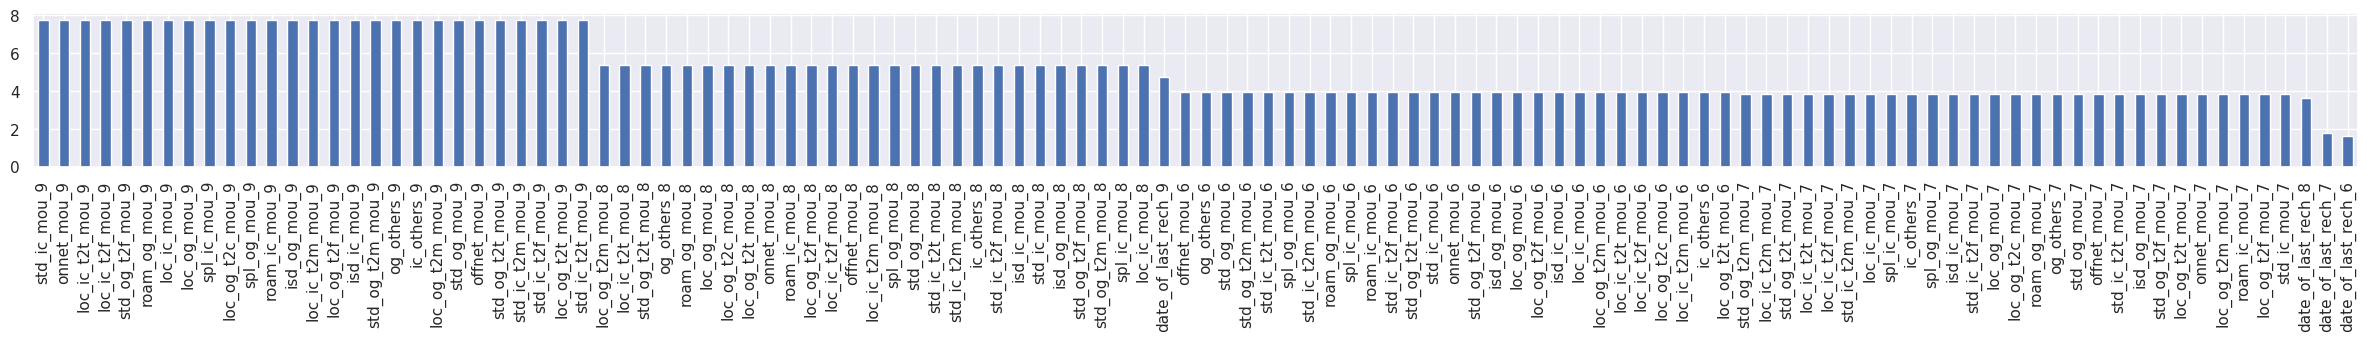

In [14]:
_,cols_with_le10_na = check_col_null_pct(telecom_df, 10)
plt.figure(figsize=(30,2))
cols_with_le10_na[(cols_with_le10_na > 0)].plot.bar()
plt.show();

##### <div style="color: lightblue; font-size: 22px;"> 8. Convert Date column to day in numbers format.

In [15]:
telecom_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']] = telecom_df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']].apply(lambda x: pd.to_datetime(x).dt.day)

##### <div style="color: lightblue; font-size: 22px;"> 9. Check for any outliers in the data set. 

In [16]:
find_outliers(telecom_df)

,col,lower_threshold,iqr_q1,iqr,iqr_q3,upper_threshold,outliers_cnt
0,aon,-1543.750,467.000,1340.500,1807.500,3818.250,121
0,arpu_6,-323.061,93.411,277.649,371.060,787.533,5750
0,arpu_7,-330.566,86.981,278.364,365.345,782.891,5793
0,arpu_8,-343.741,84.126,285.245,369.370,797.237,5588
0,arpu_9,-373.487,62.685,290.781,353.466,789.639,5275
0,aug_vbc_3g,0.000,0.000,0.000,0.000,0.000,16686
0,date_of_last_rech_6,NaN,NaN,NaN,NaN,NaN,0
0,date_of_last_rech_7,NaN,NaN,NaN,NaN,NaN,0
0,date_of_last_rech_8,NaN,NaN,NaN,NaN,NaN,0
0,date_of_last_rech_9,NaN,NaN,NaN,NaN,NaN,0


<div style="color: lightgreen; "> Observation 6: <li>There are outliers in the dataset. But due to high class imbalance, We therefore decide not to cap new outliers as it may have impact on our Model metrics.</li></div>  

##### <div style="color: lightblue; font-size: 22px;"> 10. Impute Missing Values: <li>Since there are lot of missing values in the dataset, we therefore decide to impute it. </br> <li>Also most of the columns are skewed, hence we use "median" as a strategy to impute it. </li>

In [17]:
telecom_df_bk = telecom_df.copy()
# telecom_df = telecom_df_bk

to_impute_df = telecom_df.select_dtypes(include = np.number)

si = SimpleImputer(strategy='median')
imputed_arr = si.fit_transform(to_impute_df)
df_imputed = pd.DataFrame(imputed_arr, columns = to_impute_df.columns)

telecom_df = telecom_df[telecom_df.columns.difference(to_impute_df.columns)]
telecom_df = pd.concat([telecom_df, df_imputed], axis=1)
telecom_df 

,aon,arpu_6,arpu_7,arpu_8,arpu_9,aug_vbc_3g,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,mobile_number,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,sep_vbc_3g,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9
0,968.000,197.385,214.816,213.803,21.100,30.400,21.000,16.000,8.000,28.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,101.200,252.000,252.000,252.000,0.000,92.160,92.550,5.440,91.640,0.880,0.930,1.150,0.960,56.490,57.080,4.130,56.610,15.690,15.740,0.160,15.660,65.110,63.685,0.000,61.840,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,41.030,40.430,0.000,39.120,11.910,11.610,0.000,11.260,252.000,252.000,252.000,0.000,7000842753.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,96.310,91.735,0.000,87.290,0.000,0.000,0.000,0.000,34.310,32.330,0.000,29.840,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.580,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.890,5.960,0.000,5.380,0.000,0.000,0.000,0.000,2.030,2.040,0.000,1.740,0.000,0.000,0.000,0.000,11.640,11.090,0.000,8.410,0.000,0.000,0.000,0.000,3.950,3.635,0.000,2.500,0.000,0.000,0.000,0.000,0.000,0.000,5.440,0.000,0.000,0.000,0.000,0.000,362.000,252.000,252.000,0.000,4.000,3.000,2.000,6.000,30.130,1.320,5.750,0.000,83.570,150.760,109.610,0.000
1,1006.000,34.047,355.074,268.321,86.285,0.000,29.000,31.000,28.000,30.000,0.000,0.000,0.000,0.000,1.830,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,44.000,23.000,30.000,0.000,19.090,104.230,408.430,173.030,0.000,8.930,3.610,0.000,17.480,65.380,375.580,56.930,1.610,29.910,29.230,116.090,35.390,150.510,299.540,72.110,0.000,2.910,0.000,0.000,0.000,0.000,0.000,0.000,11.510,75.940,291.860,53.760,23.880,74.560,7.680,18.340,44.00

In [18]:
# cols = telecom_df.select_dtypes(include=np.number).columns
# fig, axs = plt.subplots(int(np.ceil(len(cols)/10)),10, figsize=(30, int(np.ceil(len(cols)/10))*2))

# for idx, col in enumerate(cols):
#     t1 = axs.flatten()[idx]
#     t1.hist(telecom_df[col])
#     t1.set_title(col)

# plt.tight_layout()
# plt.show();

##### <div style="color: lightblue; font-size: 22px;"> 11. Filter the high value customers who have recharged more than 70% of the average recharge value during the good phase. 

In [19]:
# telecom_df['total_rech_amt_good_phase'] = telecom_df[['total_rech_amt_6','total_rech_amt_7']].sum(axis=1)
# telecom_df = telecom_df.drop(['total_rech_amt_6','total_rech_amt_7'], axis=1)
# telecom_df = telecom_df[(telecom_df['total_rech_amt_good_phase'] >= telecom_df['total_rech_amt_good_phase'].quantile(0.7))]

In [20]:
telecom_df['total_rech_amt_good_phase']  = telecom_df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
telecom_df = telecom_df.drop(['total_rech_amt_6','total_rech_amt_7'], axis=1)
telecom_df = telecom_df[(telecom_df['total_rech_amt_good_phase'] >= telecom_df['total_rech_amt_good_phase'].quantile(0.7))]

<div style="color: lightgreen; "> Observation 6:
After filtering the high value customers, we could notice the dataset is now reduced to ~30k rows </div>

##### <div style="color: lightblue; font-size: 22px;"> 12. Tag the churned customers (1 or 0) by applying conditions on the following fourth month columns: total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

In [21]:
telecom_df['churn'] = telecom_df.apply(lambda x: 1 if ((x['total_ic_mou_9'] < 1) & (x['total_og_mou_9'] < 1) & (x['vol_2g_mb_9'] < 1 ) & (x['vol_3g_mb_9'] < 1) )  else  0, axis=1)

##### <div style="color: lightblue; font-size: 22px;"> 13. Rename columns_8 as action phase based on business requirements.  

In [22]:
telecom_df.columns = telecom_df.columns.str.replace(pat='_8',repl='_action_phase')
telecom_df = telecom_df.rename(columns={'aug_vbc_3g': 'vbc_3g_action_phase'})
telecom_df.filter(like='_8').columns
telecom_df.shape

Index([], dtype='object')

(30011, 170)

##### <div style="color: lightblue; font-size: 22px;"> 14. Find all columns related to churn phase or cols with _9 in name. and drop it

In [23]:
sep_cols_to_drop = telecom_df.filter(like='_9').columns.to_list()
sep_cols_to_drop.append('sep_vbc_3g')
sep_cols_to_drop

['arpu_9',
 'date_of_last_rech_9',
 'ic_others_9',
 'isd_ic_mou_9',
 'isd_og_mou_9',
 'last_day_rch_amt_9',
 'loc_ic_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_og_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2t_mou_9',
 'max_rech_amt_9',
 'monthly_2g_9',
 'monthly_3g_9',
 'offnet_mou_9',
 'og_others_9',
 'onnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'sachet_2g_9',
 'sachet_3g_9',
 'spl_ic_mou_9',
 'spl_og_mou_9',
 'std_ic_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2t_mou_9',
 'std_og_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2t_mou_9',
 'total_ic_mou_9',
 'total_og_mou_9',
 'total_rech_amt_9',
 'total_rech_num_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'sep_vbc_3g']

In [24]:
telecom_df = telecom_df.drop(sep_cols_to_drop, axis=1)
telecom_df.shape

(30011, 128)

<div style="color: lightgreen; "> Observation 7:
After dropping the churn phase columns. We could now notice that the number of columns have been reduced to 131. </div>

##### <div style="color: lightblue; font-size: 22px;"> 15. Filter features that are identified by months _6 & _7, in order to combine those features as "good phase" and also check the datatypes 

In [25]:
cols_to_combine =  telecom_df.filter(regex='.*(jun_|jul_|_6|_7).*',axis=1).columns
telecom_df[cols_to_combine].info()

<class 'pandas.core.frame.DataFrame'>
Index: 30011 entries, 7 to 99997
Data columns (total 82 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   arpu_6               30011 non-null  float64
 1   arpu_7               30011 non-null  float64
 2   date_of_last_rech_6  30011 non-null  float64
 3   date_of_last_rech_7  30011 non-null  float64
 4   ic_others_6          30011 non-null  float64
 5   ic_others_7          30011 non-null  float64
 6   isd_ic_mou_6         30011 non-null  float64
 7   isd_ic_mou_7         30011 non-null  float64
 8   isd_og_mou_6         30011 non-null  float64
 9   isd_og_mou_7         30011 non-null  float64
 10  jul_vbc_3g           30011 non-null  float64
 11  jun_vbc_3g           30011 non-null  float64
 12  last_day_rch_amt_6   30011 non-null  float64
 13  last_day_rch_amt_7   30011 non-null  float64
 14  loc_ic_mou_6         30011 non-null  float64
 15  loc_ic_mou_7         30011 non-null  floa

##### <div style="color: lightblue; font-size: 22px;"> 16. Now that we have identified the features for "Good phase", using an aggr method we can go ahead combine those features. </br><li>once features are combined as "Good Phase", we drop all those redundant features of months _6&_7. 

In [26]:
drop_lst, new_cols = combine_features(df=telecom_df, cols=cols_to_combine, pat1='_6', pat2='_7',to_append='_good_phase')
telecom_df = telecom_df.drop(drop_lst, axis=1)
telecom_df.shape
telecom_df.columns

(30011, 87)

Index(['aon', 'arpu_action_phase', 'vbc_3g_action_phase',
       'date_of_last_rech_action_phase', 'ic_others_action_phase',
       'isd_ic_mou_action_phase', 'isd_og_mou_action_phase',
       'last_day_rch_amt_action_phase', 'loc_ic_mou_action_phase',
       'loc_ic_t2f_mou_action_phase', 'loc_ic_t2m_mou_action_phase',
       'loc_ic_t2t_mou_action_phase', 'loc_og_mou_action_phase',
       'loc_og_t2c_mou_action_phase', 'loc_og_t2f_mou_action_phase',
       'loc_og_t2m_mou_action_phase', 'loc_og_t2t_mou_action_phase',
       'max_rech_amt_action_phase', 'mobile_number', 'monthly_2g_action_phase',
       'monthly_3g_action_phase', 'offnet_mou_action_phase',
       'og_others_action_phase', 'onnet_mou_action_phase',
       'roam_ic_mou_action_phase', 'roam_og_mou_action_phase',
       'sachet_2g_action_phase', 'sachet_3g_action_phase',
       'spl_ic_mou_action_phase', 'spl_og_mou_action_phase',
       'std_ic_mou_action_phase', 'std_ic_t2f_mou_action_phase',
       'std_ic_t2m_mou_acti

In [27]:
cols_with_null,_ = check_col_null_pct(telecom_df)
cols_with_null

Series([], dtype: float64)

<div style="color: lightgreen; "> Observation 8:
The total no of columns are now reduced to 91 and all the null values are imputed</div>

In [28]:
telecom_df = telecom_df.drop('mobile_number', axis=1)

### Exploratory Data Analysis

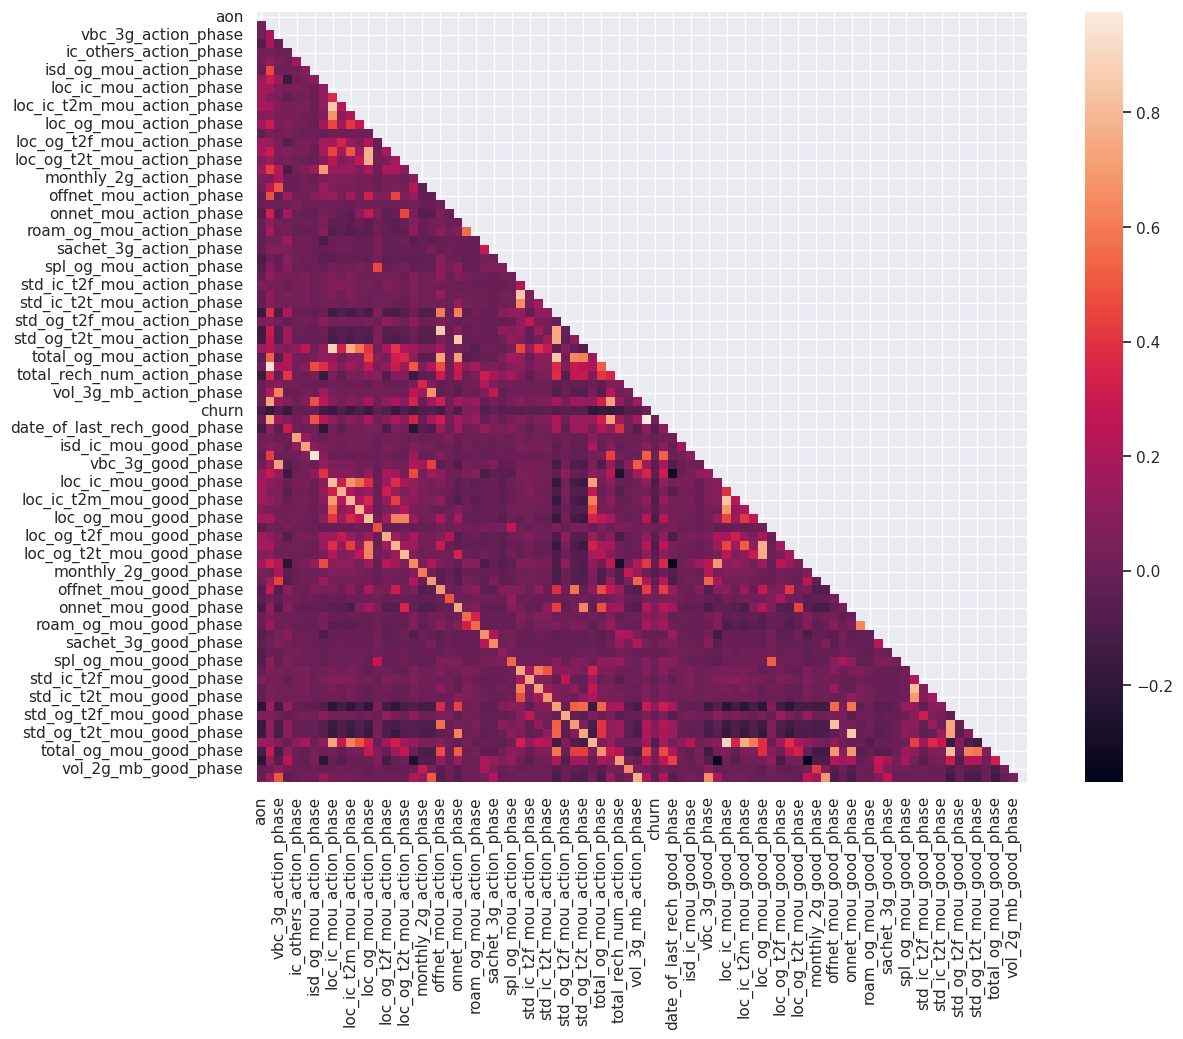

In [29]:
corr_df = telecom_df[telecom_df.select_dtypes(include=np.number).columns].corr()
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
fig, axs = plt.subplots(figsize=(15,10))
with sns.axes_style('white'):
    axs = sns.heatmap(corr_df, mask=mask, square=True)

In [30]:
corr_df = telecom_df.corr(numeric_only=True).abs()
corr_df = corr_df.unstack()
correlation = corr_df.sort_values()
correlation = corr_df.dropna()

correlation = correlation [correlation  != 1.0]
correlation = correlation .reset_index()
correlation.sort_values(by=0, ascending=False).head(10)

,level_0,level_1,0
3868,arpu_good_phase,total_rech_amt_good_phase,0.974
3699,total_rech_amt_good_phase,arpu_good_phase,0.974
3316,total_rech_amt_action_phase,arpu_action_phase,0.954
123,arpu_action_phase,total_rech_amt_action_phase,0.954
4171,isd_og_mou_good_phase,isd_og_mou_action_phase,0.949
558,isd_og_mou_action_phase,isd_og_mou_good_phase,0.949
6937,total_ic_mou_good_phase,loc_ic_mou_good_phase,0.892
4500,loc_ic_mou_good_phase,total_ic_mou_good_phase,0.892
3153,total_ic_mou_action_phase,loc_ic_mou_action_phase,0.887
716,loc_ic_mou_action_phase,total_ic_mou_action_phase,0.887


### Train and Test Split

In [31]:
X = telecom_df.drop('churn', axis=1)
y = telecom_df['churn']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y, random_state=100)

### Class Imbalance

In [33]:
# telecom_df.to_csv('test.csv')
telecom_df['churn'].sum()/len(telecom_df['churn'])*100

8.823431408483556

In [34]:
# Random OverSampling
X_train_ori_bk, y_train_ori_bk = X_train.copy(), y_train.copy()
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(random_state=100)
X_train, y_train = over_sample.fit_resample(X_train, y_train)

In [35]:
sum(y_train)/len(y_train)*100

50.0

### Scaling

In [36]:
X_train_ci_bk = X_train.copy()
X_test_ci_bk = X_test.copy()

In [37]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train, y_train)
X_train

X_test[X_test.columns] = scaler.transform(X_test)

,aon,arpu_action_phase,vbc_3g_action_phase,date_of_last_rech_action_phase,ic_others_action_phase,isd_ic_mou_action_phase,isd_og_mou_action_phase,last_day_rch_amt_action_phase,loc_ic_mou_action_phase,loc_ic_t2f_mou_action_phase,loc_ic_t2m_mou_action_phase,loc_ic_t2t_mou_action_phase,loc_og_mou_action_phase,loc_og_t2c_mou_action_phase,loc_og_t2f_mou_action_phase,loc_og_t2m_mou_action_phase,loc_og_t2t_mou_action_phase,max_rech_amt_action_phase,monthly_2g_action_phase,monthly_3g_action_phase,offnet_mou_action_phase,og_others_action_phase,onnet_mou_action_phase,roam_ic_mou_action_phase,roam_og_mou_action_phase,sachet_2g_action_phase,sachet_3g_action_phase,spl_ic_mou_action_phase,spl_og_mou_action_phase,std_ic_mou_action_phase,std_ic_t2f_mou_action_phase,std_ic_t2m_mou_action_phase,std_ic_t2t_mou_action_phase,std_og_mou_action_phase,std_og_t2f_mou_action_phase,std_og_t2m_mou_action_phase,std_og_t2t_mou_action_phase,total_ic_mou_action_phase,total_og_mou_action_phase,total_rech_amt_action_phase,total_rech_num_action_phase,vol_2g_mb_action_phase,vol_3g_mb_action_phase,total_rech_amt_good_phase,arpu_good_phase,date_of_last_rech_good_phase,ic_others_good_phase,isd_ic_mou_good_phase,isd_og_mou_good_phase,vbc_3g_good_phase,last_day_rch_amt_good_phase,loc_ic_mou_good_phase,loc_ic_t2f_mou_good_phase,loc_ic_t2m_mou_good_phase,loc_ic_t2t_mou_good_phase,loc_og_mou_good_phase,loc_og_t2c_mou_good_phase,loc_og_t2f_mou_good_phase,loc_og_t2m_mou_good_phase,loc_og_t2t_mou_good_phase,max_rech_amt_good_phase,monthly_2g_good_phase,monthly_3g_good_phase,offnet_mou_good_phase,og_others_good_phase,onnet_mou_good_phase,roam_ic_mou_good_phase,roam_og_mou_good_phase,sachet_2g_good_phase,sachet_3g_good_phase,spl_ic_mou_good_phase,spl_og_mou_good_phase,std_ic_mou_good_phase,std_ic_t2f_mou_good_phase,std_ic_t2m_mou_good_phase,std_ic_t2t_mou_good_phase,std_og_mou_good_phase,std_og_t2f_mou_good_phase,std_og_t2m_mou_good_phase,std_og_t2t_mou_good_phase,total_ic_mou_good_phase,total_og_mou_good_phase,total_rech_num_good_phase,vol_2g_mb_good_phase,vol_3g_mb_good_phase
0,-0.276,0.440,-0.262,0.932,-0.060,-0.139,-0.048,-0.133,-0.053,-0.267,0.211,-0.316,-0.415,-0.204,-0.250,-0.428,-0.197,0.008,-0.243,-0.238,1.564,0.344,0.306,-0.190,-0.233,-0.275,-0.123,-0.191,-0.247,2.559,-0.117,2.856,0.845,1.738,-0.124,2.163,0.493,0.921,1.307,0.530,1.080,-0.203,-0.246,-0.252,-0.275,0.888,0.017,-0.188,-0.079,-0.315,-0.313,-0.523,-0.311,-0.443,-0.342,-0.575,-0.232,-0.185,-0.551,-0.316,-0.536,-0.325,-0.317,0.346,0.729,0.185,-0.224,-0.294,-0.298,-0.167,-0.289,-0.369,0.604,-0.161,0.797,0.123,0.769,-0.160,0.711,0.388,-0.234,0.450,0.223,-0.289,-0.308
1,-0.495,0.556,0.039,-1.500,-0.083,2.057,-0.028,3.376,6.263,6.557,7.739,-0.098,0.210,-0.204,-0.200,0.611,-0.262,2.324,-0.243,-0.238,-0.118,-0.022,-0.473,-0.190,-0.233,-0.275,-0.123,-0.191,-0.265,-0.306,-0.117,-0.253,-0.188,-0.495,-0.124,-0.376,-0.363,5.473,-0.318,0.425,-0.672,-0.203,-0.246,0.939,0.908,-0.213,-0.101,-0.156,-0.063,0.077,3.282,10.279,10.435,12.927,-0.020,1.908,-0.233,-0.133,3.007,-0.046,2.021,-0.325,-0.317,0.751,-0.122,-0.550,-0.224,-0.295,-0.298,0.452,-0.289,-0.323,0.708,-0.161,1.249,-0.220,-0.735,-0.160,-0.515,-0.536,9.043,0.223,-0.492,-0.287,-0.219
2,-0.799,0.540,-0.262,0.064,0.205,-0.139,-0.048,0.429,-0.573,-0.267,-0.511,-0.348,-0.550,-0.189,-0.250,-0.549,-0.289,0.008,-0.243,-0.238,-0.636,-0.022,0.470,-0.190,-0.233,-0.275,-0.123,-0.191,-0.260,0.438,-0.117,0.008,0.896,0.268,-0.124,-0.342,0.727,-0.282,-0.027,0.519,-0.124,-0.203,-0.246,0.159,0.166,0.200,-0.101,-0.188,-0.079,-0.315,0.168,-0.592,-0.310,-0.525,-0.368,-0.700,-0.195,-0.185,-0.690,-0.372,-0.298,-0.325,-0.317,-0.805,-0.122,0.093,-0.031,-0.172,-0.298,-0.167,-0.289,-0.341,0.004,-0.161,-0.089,0.139,-0.140,-0.160,-0.465,0.286,-0.535,-0.494,-0.162,-0.289,-0.308
3,-0.301,-0.850,-0.262,-3.237,-0.083,-0.139,-0.048,-0.322,-0.657,-0.267,-0.613,-0.374,-0.573,-0.204,-0.250,-0.575,-0.300,-0.583,-0.243,-0.238,-0.672,-0.022,-0.484,-0.164,-0.182,-0.275,-0.123,-0.191,-0.265,-0.306,-0.117,

### ----------------------------------

### Models Without PCA

##### Custom Functions

In [38]:
def model_training(fXt, fyt, fcutoff, ftest=False, fres=None):
    fXt_sm = sm.add_constant(fXt)
    
    if ftest == False:
        lrm = sm.GLM(fyt, fXt_sm, family=sm.families.Binomial())
        lrm = lrm.fit()
        fyt_pred = lrm.predict(fXt_sm)
    else:
        lrm = fres
        fyt_pred = lrm.predict(fXt_sm)
        
    fyt_pred = fyt_pred.values.reshape(-1)
    fyt_pred_final = pd.DataFrame({'Converted': fyt.values, 'Conv_Prob': fyt_pred})
    fyt_pred_final['ID'] = fyt.index
    fyt_pred_final['predicted'] = fyt_pred_final.Conv_Prob.map(lambda x: 1 if x > fcutoff else 0)
    return lrm, fyt_pred, fyt_pred_final

def logreg_metrics_fn(fyt_pred_final):
    fconfusion = confusion_matrix(fyt_pred_final.Converted, fyt_pred_final.predicted )
    faccuracy = accuracy_score(fyt_pred_final.Converted, fyt_pred_final.predicted)
    
    TP = fconfusion[1,1] # true positive 
    TN = fconfusion[0,0] # true negatives
    FP = fconfusion[0,1] # false positives
    FN = fconfusion[1,0] # false negatives
    
    fSensi  = TP/(TP+FN) # Calculate the sensitivity
    fSpeci  = TN/(TN+FP) # Calculate the specificity
    fPreci  = TP/(TP+FP) # Calculate Precision
    fRecal  = TP/(TP+FN) # Calculate Recall
       
    return fconfusion, faccuracy, fSensi, fSpeci, fPreci, fRecal

def get_vif_score(fXt, cl):
    vif = pd.DataFrame()
    vif['Features'] = fXt[cl].columns
    vif['VIF'] = [variance_inflation_factor(fXt[cl].values, i) for i in range(fXt[cl].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

def generate_metrics(yt, yt_pred, yt_prob ):
    accuracy = accuracy_score(yt, yt_pred,  )
    f1_sc = f1_score(yt, yt_pred,  )
    recall = recall_score(yt, yt_pred,  )
    precision = precision_score(yt, yt_pred,  )
    roc_score = roc_auc_score(yt, yt_prob)
    df = pd.DataFrame({"accuracy":[accuracy],"roc_score":[roc_score],"precision":[precision],"recall":[recall],"f1_score":[f1_sc]})
    return df, accuracy,roc_score, precision,recall, f1_sc

def generate_summary_report(df=None, model_name="", accuracy="", roc_score="", precision="", recall="", f1_score="", step='create'):
    if step == 'create':
        df = pd.DataFrame(columns=["model_name","accuracy","roc_score","precision","recall","f1_score"])
        return df
    elif step == 'add': 
        df.loc[len(df)] = pd.Series({"model_name": model_name,"accuracy": accuracy,"roc_score": roc_score,"precision": precision,"recall": recall,"f1_score":f1_score})
        return df

#### Logistic Regression by RFE

##### Model Building

In [39]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)

In [40]:
rfe = RFE(estimator=logreg, n_features_to_select= 15) 
rfe = rfe.fit(X_train, y_train)

In [41]:
cols = rfe.get_feature_names_out()
rfe_df = pd.DataFrame({'feature':X_train.columns, 'rank': rfe.ranking_ , 'support': rfe.support_})
rfe_df.sort_values(by='rank', ascending=True).head(20)

,feature,rank,support
72,std_ic_mou_good_phase,1,True
47,isd_ic_mou_good_phase,1,True
22,onnet_mou_action_phase,1,True
65,onnet_mou_good_phase,1,True
63,offnet_mou_good_phase,1,True
12,loc_og_mou_action_phase,1,True
29,std_ic_mou_action_phase,1,True
8,loc_ic_mou_action_phase,1,True
51,loc_ic_mou_good_phase,1,True
80,total_ic_mou_good_phase,1,True


In [42]:
logreg = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logreg = logreg.fit()
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38306
Model:                            GLM   Df Residuals:                    38220
Model Family:                Binomial   Df Model:                           85
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14415.
Date:                Fri, 29 Nov 2024   Deviance:                       28831.
Time:                        00:03:09   Pearson chi2:                 8.24e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4694
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0480      0.020      2.373      0.018       0.008       0.088
aon                               -0.2563      0.017    -14.871      0.000      -0.290      -0.222
arpu_action_phase                  0.3560      0.070      5.079      0.000       0.219       0.493
vbc_3g_action_phase                0.1127      0.032      3.481      0.001       0.049       0.176
date_of_last_rech_action_phase    -0.5866      0.018    -31.764      0.000      -0.623      -0.550
ic_others_action_phase            80.2860     18.318      4.383      0.000      44.384     116.188
isd_ic_mou_action_phase          421.7639     96.406      4.375      0.000     232.812     610.716
isd_og_mou_action_phase          275.1294     82.433      3.338      0.001     113.564     436.695
last_day_rch_amt_action_phase     -0.5124      0.026    -20.039      0.000      -0.563      -0.462
loc_ic_mou_action_phase        -9718.8390    685.101    -14.186      0.000   -1.11e+04   -8376.066
loc_ic_t2f_mou_action_phase     1618.0628     92.986     17.401      0.000    1435.814    1800.312
loc_ic_t2m_mou_action_phase     8111.7917    466.162     17.401      0.000    7198.130    9025.453
loc_ic_t2t_mou_action_phase     5615.2192    322.673     17.402      0.000    4982.792    6247.647
loc_og_mou_action_phase        -5289.5394   1015.619     -5.208      0.000   -7280.116   -3298.963
loc_og_t2c_mou_action_phase        0.0473      0.019      2.553      0.011       0.011       0.084
loc_og_t2f_mou_action_phase      407.6225     46.201      8.823      0.000     317.071     498.174
loc_og_t2m_mou_action_phase     4866.5610    551.466      8.825      0.000    3785.707    5947.415
loc_og_t2t_mou_action_phase     4747.0967    538.001      8.824      0.000    3692.633    5801.560
max_rech_amt_action_phase          0.3011      0.031      9.592      0.000       0.240       0.363
monthly_2g_action_phase           -0.2947      0.027    -10.981      0.000      -0.347      -0.242
monthly_3g_action_phase           -0.3901      0.038    -10.376      0.000      -0.464      -0.316
offnet_mou_action_phase            4.2972      1.061      4.052      0.000       2.219       6.376
og_others_action_phase            51.3701     15.318      3.353      0.001      21.347      81.394
onnet_mou_action_phase             5.1051      1.117      4.571      0.000       2.916       7.294
roam_ic_mou_action_phase           0.0397      0.031      1.277      0.202      -0.021       0.101
roam_og_mou_action_phase          -1.3463      0.353     -3.819      0.000      -2.037      -0.655
sachet_2g_action_phase            -0.1581      0.022     -7.078      0.000      -0.202      -0.114
sachet_3g_action_phase            -0.0136      0.024     -0.568      0.570      -0.061       0.033
spl_ic_mou_act

In [43]:
logreg1, y_train_pred, y_train_pred_final = model_training(X_train[cols], y_train, 0.5)
logreg1.pvalues.sort_values(ascending=False).head()

vif_scores = get_vif_score(X_train, cols)
vif_scores[vif_scores['VIF'] > 5].head()

cf_matrix, accuracy, sensitivity, specificity, precision, recall = logreg_metrics_fn(y_train_pred_final)
print(f'Sensitivity - {round(sensitivity,3)}\nspecificity - {round(specificity,3)}\nPrecision - {round(precision,3)}\nRecall - {round(recall,3)}')

const                     0.006
total_ic_mou_good_phase   0.000
std_ic_mou_good_phase     0.000
loc_ic_mou_good_phase     0.000
isd_ic_mou_good_phase     0.000
dtype: float64

,Features,VIF
14,total_ic_mou_good_phase,430.710
10,loc_ic_mou_good_phase,318.820
7,total_ic_mou_action_phase,92.080
13,std_ic_mou_good_phase,70.130
2,loc_ic_mou_action_phase,66.300


Sensitivity - 0.803
specificity - 0.847
Precision - 0.84
Recall - 0.803


In [44]:
cols = list(cols)
# cols.append('loc_ic_t2m_mou_action_phase')
# cols.remove('loc_ic_t2m_mou_action_phase')

# cols.append('std_og_mou_good_phase')
# cols.remove('std_og_mou_good_phase')

# cols.append('total_ic_mou_good_phase')
cols.remove('total_ic_mou_good_phase')

logreg2, y_train_pred, y_train_pred_final = model_training(X_train[cols], y_train, 0.5)
logreg2.pvalues.sort_values(ascending=False).head()

vif_scores = get_vif_score(X_train,cols)
vif_scores[vif_scores['VIF'] > 5]

cf_matrix, accuracy, sensitivity, specificity, precision, recall = logreg_metrics_fn(y_train_pred_final)
print(f'Sensitivity - {round(sensitivity,3)}\nspecificity - {round(specificity,3)}\nPrecision - {round(precision,3)}\nRecall - {round(recall,3)}')

const                     0.006
std_ic_mou_good_phase     0.000
isd_ic_mou_good_phase     0.000
offnet_mou_action_phase   0.000
onnet_mou_action_phase    0.000
dtype: float64

,Features,VIF
7,total_ic_mou_action_phase,77.810
2,loc_ic_mou_action_phase,56.540
8,total_og_mou_action_phase,23.450
6,std_ic_mou_action_phase,13.010
5,onnet_mou_action_phase,11.360
4,offnet_mou_action_phase,10.880


Sensitivity - 0.799
specificity - 0.846
Precision - 0.838
Recall - 0.799


In [45]:
cols = list(cols)
# cols.append('total_ic_mou_action_phase')
cols.remove('total_ic_mou_action_phase')

# cols.append('total_ic_mou_good_phase')
# cols.remove('total_ic_mou_good_phase')

logreg3, y_train_pred, y_train_pred_final = model_training(X_train[cols], y_train, 0.5)
logreg3.pvalues.sort_values(ascending=False).head()

vif_scores = get_vif_score(X_train,cols)
vif_scores[vif_scores['VIF'] > 5]

cf_matrix, accuracy, sensitivity, specificity, precision, recall = logreg_metrics_fn(y_train_pred_final)
print(f'Sensitivity - {round(sensitivity,3)}\nspecificity - {round(specificity,3)}\nPrecision - {round(precision,3)}\nRecall - {round(recall,3)}')

std_ic_mou_good_phase     0.000
const                     0.000
isd_ic_mou_good_phase     0.000
isd_ic_mou_action_phase   0.000
std_ic_mou_action_phase   0.000
dtype: float64

,Features,VIF
7,total_og_mou_action_phase,22.220
5,onnet_mou_action_phase,11.020
4,offnet_mou_action_phase,10.580


Sensitivity - 0.841
specificity - 0.813
Precision - 0.818
Recall - 0.841


In [46]:
cols = list(cols)
# cols.append('loc_ic_t2t_mou_action_phase')
# cols.remove('loc_ic_t2t_mou_action_phase')

# cols.append('total_og_mou_action_phase')
cols.remove('total_og_mou_action_phase')

# cols.append('loc_ic_t2t_mou_action_phase')
# cols.remove('total_ic_mou_action_phase')

logreg4, y_train_pred, y_train_pred_final = model_training(X_train[cols], y_train, 0.5)
logreg4.pvalues.sort_values(ascending=False).head()

vif_scores = get_vif_score(X_train,cols)
vif_scores[vif_scores['VIF'] > 5].head()

cf_matrix, accuracy, sensitivity, specificity, precision, recall = logreg_metrics_fn(y_train_pred_final)
print(f'Sensitivity - {round(sensitivity,3)}\nspecificity - {round(specificity,3)}\nPrecision - {round(precision,3)}\nRecall - {round(recall,3)}')

std_ic_mou_good_phase     0.000
isd_ic_mou_good_phase     0.000
isd_ic_mou_action_phase   0.000
const                     0.000
loc_ic_mou_good_phase     0.000
dtype: float64

,Features,VIF


Sensitivity - 0.823
specificity - 0.767
Precision - 0.779
Recall - 0.823


In [47]:
cols = list(cols)
# cols.append('total_og_mou_good_phase')
# cols.remove('total_og_mou_good_phase')

# cols.append('loc_ic_mou_good_phase')
# cols.remove('loc_ic_mou_good_phase')

logreg5, y_train_pred, y_train_pred_final = model_training(X_train[cols], y_train, 0.5)
logreg5.pvalues.sort_values(ascending=False).head()

vif_scores = get_vif_score(X_train,cols)
vif_scores[vif_scores['VIF'] > 5].head()

cf_matrix, accuracy, sensitivity, specificity, precision, recall = logreg_metrics_fn(y_train_pred_final)
print(f'Sensitivity - {round(sensitivity,3)}\nspecificity - {round(specificity,3)}\nPrecision - {round(precision,3)}\nRecall - {round(recall,3)}')

std_ic_mou_good_phase     0.000
isd_ic_mou_good_phase     0.000
isd_ic_mou_action_phase   0.000
const                     0.000
loc_ic_mou_good_phase     0.000
dtype: float64

,Features,VIF


Sensitivity - 0.823
specificity - 0.767
Precision - 0.779
Recall - 0.823


In [48]:
cols = list(cols)
# cols.append('total_ic_mou_good_phase')
# cols.remove('total_ic_mou_good_phase')

# cols.append('total_og_mou_action_phase')
# cols.remove('total_og_mou_action_phase')

logreg6, y_train_pred, y_train_pred_final = model_training(X_train[cols], y_train, 0.5)
logreg6.pvalues.sort_values(ascending=False).head()

vif_scores = get_vif_score(X_train,cols)
vif_scores[vif_scores['VIF'] > 5].head()

cf_matrix, accuracy, sensitivity, specificity, precision, recall = logreg_metrics_fn(y_train_pred_final)
print(f'Sensitivity - {round(sensitivity,3)}\nspecificity - {round(specificity,3)}\nPrecision - {round(precision,3)}\nRecall - {round(recall,3)}')

std_ic_mou_good_phase     0.000
isd_ic_mou_good_phase     0.000
isd_ic_mou_action_phase   0.000
const                     0.000
loc_ic_mou_good_phase     0.000
dtype: float64

,Features,VIF


Sensitivity - 0.823
specificity - 0.767
Precision - 0.779
Recall - 0.823


In [49]:
cols = list(cols)
# cols.append('isd_ic_mou_action_phase')
# cols.remove('isd_ic_mou_action_phase')

logreg7, y_train_pred, y_train_pred_final = model_training(X_train[cols], y_train, 0.5)
logreg7.pvalues.sort_values(ascending=False).head()

vif_scores = get_vif_score(X_train,cols)
vif_scores.head()

cf_matrix, accuracy, sensitivity, specificity, precision, recall = logreg_metrics_fn(y_train_pred_final)
print(f'Sensitivity - {round(sensitivity,3)}\nspecificity - {round(specificity,3)}\nPrecision - {round(precision,3)}\nRecall - {round(recall,3)}')

std_ic_mou_good_phase     0.000
isd_ic_mou_good_phase     0.000
isd_ic_mou_action_phase   0.000
const                     0.000
loc_ic_mou_good_phase     0.000
dtype: float64

,Features,VIF
2,loc_ic_mou_action_phase,2.660
8,loc_ic_mou_good_phase,2.220
5,onnet_mou_action_phase,1.980
6,std_ic_mou_action_phase,1.920
11,std_ic_mou_good_phase,1.870


Sensitivity - 0.823
specificity - 0.767
Precision - 0.779
Recall - 0.823


In [50]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci', 'preci', 'recall'])
for i in numbers:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    recall = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i, accuracy, sensi, speci, preci, recall]
cutoff_df

,Converted,Conv_Prob,ID,predicted,0.000,0.100,0.200,0.300,0.400,0.500,0.600,0.700,0.800,0.900
0,0,0.099,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.085,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.535,2,1,1,1,1,1,1,1,0,0,0,0
3,0,0.995,3,1,1,1,1,1,1,1,1,1,1,1
4,0,0.001,4,0,1,0,0,0,0,0,0,0,0,0


,prob,accuracy,sensi,speci,preci,recall
0.000,0.000,0.500,1.000,0.000,0.500,1.000
0.100,0.100,0.604,0.974,0.234,0.560,0.974
0.200,0.200,0.666,0.953,0.379,0.605,0.953
0.300,0.300,0.723,0.930,0.516,0.658,0.930
0.400,0.400,0.774,0.897,0.650,0.719,0.897
0.500,0.500,0.795,0.823,0.767,0.779,0.823
0.600,0.600,0.778,0.699,0.856,0.829,0.699
0.700,0.700,0.724,0.531,0.917,0.864,0.531
0.800,0.800,0.655,0.352,0.957,0.892,0.352
0.900,0.900,0.562,0.139,0.985,0.903,0.139


<Axes: xlabel='prob'>

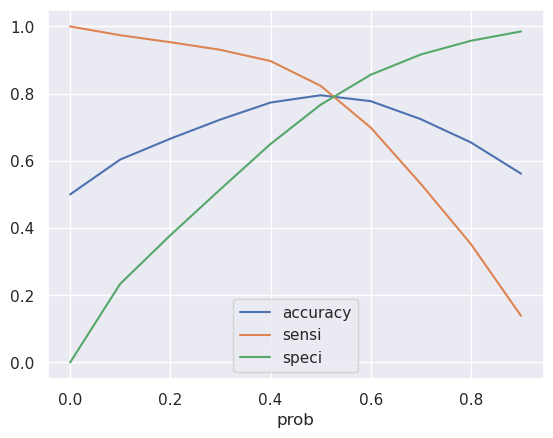

In [51]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [52]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.55 else 0)
y_train_pred_final.head()

# Let's check the overall accuracy.
cf_matrix, accuracy, sensitivity, specificity, precision, recall = logreg_metrics_fn(y_train_pred_final)
print(f'Sensitivity - {round(sensitivity,3)}\nspecificity - {round(specificity,3)}\nPrecision - {round(precision,3)}\nRecall - {round(recall,3)}')

,Converted,Conv_Prob,ID,predicted,0.000,0.100,0.200,0.300,0.400,0.500,0.600,0.700,0.800,0.900,final_predicted
0,0,0.099,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.085,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.535,2,1,1,1,1,1,1,1,0,0,0,0,0
3,0,0.995,3,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.001,4,0,1,0,0,0,0,0,0,0,0,0,0


Sensitivity - 0.823
specificity - 0.767
Precision - 0.779
Recall - 0.823


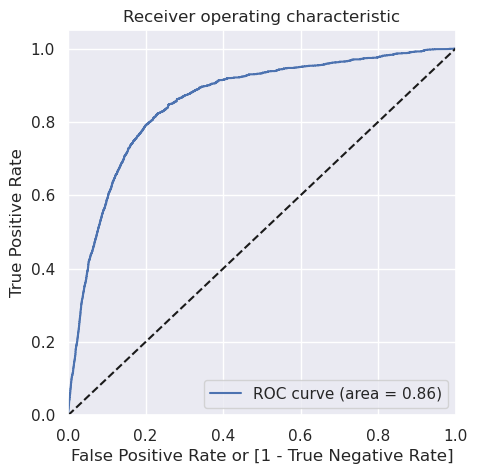

In [53]:
# created a function for the ROC curve creation and see the lables 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return None

fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

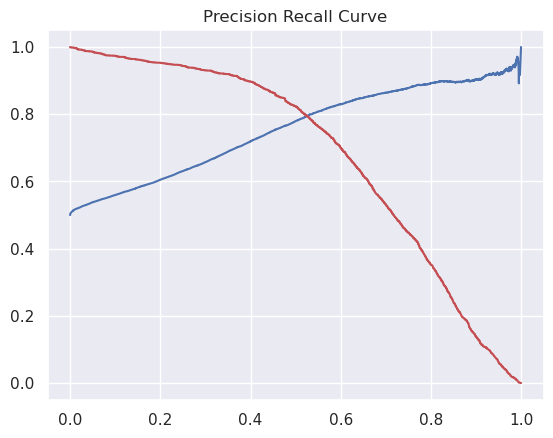

In [54]:
# plotting Presicion and Recall curve and finding the cutoff for this.
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)
plt.plot(thresholds, p[:-1], "b")
plt.plot(thresholds, r[:-1], "r")
plt.title('Precision Recall Curve')
plt.show();

In [55]:
# used the cutoff value to see the prediction on train dataset.
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.53 else 0)
y_train_pred_final.head()

# Let's check the overall accuracy. 
cf_matrix, accuracy, sensitivity, specificity, precision, recall = logreg_metrics_fn(y_train_pred_final)
print(f'Sensitivity - {round(sensitivity,3)}\nspecificity - {round(specificity,3)}\nPrecision - {round(precision,3)}\nRecall - {round(recall,3)}')

,Converted,Conv_Prob,ID,predicted,0.000,0.100,0.200,0.300,0.400,0.500,0.600,0.700,0.800,0.900,final_predicted
0,0,0.099,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.085,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.535,2,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.995,3,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.001,4,0,1,0,0,0,0,0,0,0,0,0,0


Sensitivity - 0.823
specificity - 0.767
Precision - 0.779
Recall - 0.823


##### Model Testing

In [56]:
logregp, y_test_pred, y_test_pred_final = model_training(X_test[cols], y_test, 0.55, True, logreg7)

# logregp.pvalues.sort_values(ascending=False).head()
# vif_scores = get_vif_score(X_train, cols)
# vif_scores[vif_scores['VIF'] > 5].head()

cf_matrix, accuracy, sensitivity, specificity, precision, recall = logreg_metrics_fn(y_test_pred_final)
roc_score = roc_auc_score( y_test_pred_final.Converted, y_test_pred_final.Conv_Prob )
f1_sc = f1_score(y_test, y_test_pred_final.predicted)

print(f'Accuracy - {round(accuracy,3)}\nroc_score - {round(roc_score,3)}\nSensitivity - {round(sensitivity,3)}\nSpecificity - {round(specificity,3)}\nPrecision - {round(precision,3)}\nRecall - {round(recall,3)}')

overall_summary_df = generate_summary_report()
overall_summary_df = generate_summary_report(df=overall_summary_df, model_name="LogisticRegression", accuracy=accuracy, roc_score=roc_score, 
                                             precision=precision, recall=recall, f1_score=f1_sc , step='add')

Accuracy - 0.822
roc_score - 0.862
Sensitivity - 0.77
Specificity - 0.827
Precision - 0.301
Recall - 0.77


#### DecisionTreeClassifier

In [57]:
# Decision Trees - Base
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=100, max_depth=3)
dtc.fit(X_train, y_train)

# Get feature importance
dtc_feature_importances = dtc.feature_importances_
dtc_feature_imp_df = pd.DataFrame({'columns':X.columns, 'imp_score': dtc_feature_importances})
dtc_feature_imp_df.sort_values(by='imp_score', ascending=False).head(5)

y_prob_dtc = dtc.predict_proba(X_test)[:, 1]
y_pred_dtc = dtc.predict(X_test)

metrics_df, accuracy,roc_score, precision,recall, f1_sc = generate_metrics(y_test, yt_pred=y_pred_dtc, yt_prob=y_prob_dtc)
metrics_df
print ('\n classification report:\n', classification_report(y_test,y_pred_dtc))
print ('\n confusion matrix:\n',confusion_matrix(y_test, y_pred_dtc))

overall_summary_df = generate_summary_report(df=overall_summary_df, model_name="DecisionTreeClassifier", accuracy=accuracy, roc_score=roc_score, 
                                             precision=precision, recall=recall, f1_score=f1_sc , step='add')

DecisionTreeClassifier(max_depth=3, random_state=100)

,columns,imp_score
37,total_ic_mou_action_phase,0.744
24,roam_og_mou_action_phase,0.136
39,total_rech_amt_action_phase,0.056
12,loc_og_mou_action_phase,0.035
7,last_day_rch_amt_action_phase,0.022


,accuracy,roc_score,precision,recall,f1_score
0,0.876,0.885,0.393,0.747,0.515



 classification report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      8210
           1       0.39      0.75      0.51       794

    accuracy                           0.88      9004
   macro avg       0.68      0.82      0.72      9004
weighted avg       0.92      0.88      0.89      9004


 confusion matrix:
 [[7293  917]
 [ 201  593]]


#### RandomForestClassifier

In [58]:

rf = RandomForestClassifier(random_state=100, n_estimators=100)
rf.fit(X_train, y_train)

# Get feature importance
rf_feature_importances = rf.feature_importances_
rf_feature_imp_df = pd.DataFrame({'columns':X.columns, 'imp_score': rf_feature_importances})
rf_feature_imp_df.sort_values(by='imp_score', ascending=False).head(15)

rf_y_prob = rf.predict_proba(X_test)[:, 1]
rf_y_pred = rf.predict(X_test)

metrics_df, accuracy, roc_score, precision,recall, f1_sc = generate_metrics(y_test, yt_pred=rf_y_pred, yt_prob=rf_y_prob)
metrics_df
print ('\n classification report:\n', classification_report(y_test,rf_y_pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, rf_y_pred))

overall_summary_df = generate_summary_report(df=overall_summary_df, model_name="RandomForestClassifier", accuracy=accuracy, roc_score=roc_score, 
                                             precision=precision, recall=recall, f1_score=f1_sc , step='add')

RandomForestClassifier(random_state=100)

,columns,imp_score
37,total_ic_mou_action_phase,0.068
38,total_og_mou_action_phase,0.067
8,loc_ic_mou_action_phase,0.049
7,last_day_rch_amt_action_phase,0.045
15,loc_og_t2m_mou_action_phase,0.040
39,total_rech_amt_action_phase,0.039
3,date_of_last_rech_action_phase,0.037
24,roam_og_mou_action_phase,0.036
1,arpu_action_phase,0.034
10,loc_ic_t2m_mou_action_phase,0.030


,accuracy,roc_score,precision,recall,f1_score
0,0.939,0.941,0.713,0.515,0.598



 classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      8210
           1       0.71      0.52      0.60       794

    accuracy                           0.94      9004
   macro avg       0.83      0.75      0.78      9004
weighted avg       0.93      0.94      0.93      9004


 confusion matrix:
 [[8045  165]
 [ 385  409]]


#### GradientBoostingClassifier

In [59]:

gbc = GradientBoostingClassifier(random_state=100)
gbc.fit(X_train, y_train)

# Get feature importance
gbc_feature_importances = gbc.feature_importances_
gbc_feature_imp_df = pd.DataFrame({'columns':X.columns, 'imp_score': gbc_feature_importances})
gbc_feature_imp_df.sort_values(by='imp_score', ascending=False).head(15)

gbc_prediction_prob = gbc.predict_proba(X_test)[:,1]
gbc_prediction = gbc.predict(X_test)

metrics_df, accuracy, roc_score, precision,recall, f1_sc = generate_metrics(y_test, yt_pred=gbc_prediction, yt_prob=gbc_prediction_prob)
metrics_df
print ('\n classification report:\n', classification_report(y_test,gbc_prediction))
print ('\n confusion matrix:\n',confusion_matrix(y_test, gbc_prediction))

overall_summary_df = generate_summary_report(df=overall_summary_df, model_name="GradientBoostingClassifier", accuracy=accuracy, roc_score=roc_score, 
                                             precision=precision, recall=recall, f1_score=f1_sc , step='add')

GradientBoostingClassifier(random_state=100)

,columns,imp_score
37,total_ic_mou_action_phase,0.474
7,last_day_rch_amt_action_phase,0.094
3,date_of_last_rech_action_phase,0.090
24,roam_og_mou_action_phase,0.090
39,total_rech_amt_action_phase,0.031
82,total_rech_num_good_phase,0.019
42,vol_3g_mb_action_phase,0.015
15,loc_og_t2m_mou_action_phase,0.014
14,loc_og_t2f_mou_action_phase,0.013
23,roam_ic_mou_action_phase,0.013


,accuracy,roc_score,precision,recall,f1_score
0,0.903,0.947,0.472,0.863,0.611



 classification report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.94      8210
           1       0.47      0.86      0.61       794

    accuracy                           0.90      9004
   macro avg       0.73      0.88      0.78      9004
weighted avg       0.94      0.90      0.92      9004


 confusion matrix:
 [[7445  765]
 [ 109  685]]


#### XGBoostClassifier

In [60]:
xgb_cfl =  xgb.XGBClassifier(scale_pos_weight= 1, objective = 'binary:logistic', random_state= 100)
xgb_cfl.fit(X_train, y_train)

# Get feature importance
xgb_feature_importances = xgb_cfl.feature_importances_
xgb_feature_imp_df = pd.DataFrame({'columns':X.columns, 'imp_score': xgb_feature_importances})
xgb_feature_imp_df.sort_values(by='imp_score', ascending=False).head(15)

xgb_y_prob = xgb_cfl.predict_proba(X_test)[:,1]
xgb_y_pred = xgb_cfl.predict(X_test)

metrics_df, accuracy, roc_score, precision,recall, f1_sc = generate_metrics(y_test, yt_pred=xgb_y_pred, yt_prob=xgb_y_prob)
metrics_df
print ('\n classification report:\n', classification_report(y_test, xgb_y_pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, xgb_y_pred)) 

overall_summary_df = generate_summary_report(df=overall_summary_df, model_name="XGBClassifier", accuracy=accuracy, roc_score=roc_score, 
                                             precision=precision, recall=recall, f1_score=f1_sc , step='add')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

,columns,imp_score
37,total_ic_mou_action_phase,0.218
24,roam_og_mou_action_phase,0.047
7,last_day_rch_amt_action_phase,0.039
3,date_of_last_rech_action_phase,0.031
27,spl_ic_mou_action_phase,0.026
42,vol_3g_mb_action_phase,0.025
39,total_rech_amt_action_phase,0.024
12,loc_og_mou_action_phase,0.018
82,total_rech_num_good_phase,0.018
67,roam_og_mou_good_phase,0.017


,accuracy,roc_score,precision,recall,f1_score
0,0.937,0.940,0.627,0.693,0.658



 classification report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      8210
           1       0.63      0.69      0.66       794

    accuracy                           0.94      9004
   macro avg       0.80      0.83      0.81      9004
weighted avg       0.94      0.94      0.94      9004


 confusion matrix:
 [[7883  327]
 [ 244  550]]


#### LightGBM Classifier

In [61]:
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)

# Get feature importance
lgbm_feature_importances = lgbm_clf.feature_importances_
lgbm_feature_imp_df = pd.DataFrame({'columns':X.columns, 'imp_score': lgbm_feature_importances})
lgbm_feature_imp_df.sort_values(by='imp_score', ascending=False).head(15)

lgbm_y_prob = lgbm_clf.predict_proba(X_test)[:,1]
lgbm_y_pred = lgbm_clf.predict(X_test)

metrics_df, accuracy, roc_score, precision,recall, f1_sc = generate_metrics(y_test, yt_pred=lgbm_y_pred, yt_prob=lgbm_y_prob)
metrics_df
print ('\n classification report:\n', classification_report(y_test, lgbm_y_pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, lgbm_y_pred)) 

overall_summary_df = generate_summary_report(df=overall_summary_df, model_name="LGBMClassifier", accuracy=accuracy, roc_score=roc_score, 
                                             precision=precision, recall=recall, f1_score=f1_sc , step='add')

[LightGBM] [Info] Number of positive: 19153, number of negative: 19153
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18315
[LightGBM] [Info] Number of data points in the train set: 38306, number of used features: 85
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

,columns,imp_score
3,date_of_last_rech_action_phase,152
7,last_day_rch_amt_action_phase,99
0,aon,94
37,total_ic_mou_action_phase,94
24,roam_og_mou_action_phase,87
82,total_rech_num_good_phase,72
44,arpu_good_phase,66
1,arpu_action_phase,61
23,roam_ic_mou_action_phase,57
41,vol_2g_mb_action_phase,56


,accuracy,roc_score,precision,recall,f1_score
0,0.926,0.950,0.553,0.821,0.661



 classification report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      8210
           1       0.55      0.82      0.66       794

    accuracy                           0.93      9004
   macro avg       0.77      0.88      0.81      9004
weighted avg       0.94      0.93      0.93      9004


 confusion matrix:
 [[7684  526]
 [ 142  652]]


### ----------------------------------

### Models using PCA

In [62]:
pca = PCA(random_state=100)
pca.fit(X_train)

var_ratio_df = pd.DataFrame({'feature':X.columns, 'var_ratio': pca.explained_variance_ratio_})
components = pd.DataFrame(pca.components_)
var_ratio_df = pd.concat([var_ratio_df,components],axis=1)
var_ratio_df.head()

PCA(random_state=100)

,feature,var_ratio,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
0,aon,0.112,0.071,0.233,0.078,0.060,0.031,0.047,0.054,0.117,0.225,0.105,0.201,0.149,0.225,0.036,0.094,0.206,0.144,0.149,0.046,0.074,0.183,0.026,0.129,0.005,0.018,0.027,0.028,0.017,0.060,0.104,0.048,0.084,0.070,0.107,0.044,0.089,0.072,0.244,0.209,0.231,0.115,0.027,0.076,0.161,0.159,0.054,0.021,0.034,0.046,0.059,0.089,0.191,0.097,0.171,0.120,0.196,0.013,0.069,0.172,0.124,0.094,0.030,0.051,0.101,0.025,0.060,-0.001,-0.001,0.003,0.012,0.005,0.032,0.071,0.047,0.055,0.048,0.017,0.042,0.018,0.006,0.200,0.118,0.033,0.006,0.052
1,arpu_action_phase,0.086,-0.097,0.098,-0.083,0.060,-0.015,-0.029,0.016,-0.040,-0.148,-0.093,-0.131,-0.087,-0.066,0.046,-0.070,-0.080,-0.016,-0.041,-0.060,-0.076,0.136,0.006,0.199,0.015,0.041,0.006,0.011,0.034,0.068,0.032,-0.033,0.023,0.038,0.284,-0.028,0.197,0.230,-0.111,0.218,0.097,0.151,-0.027,-0.069,0.114,0.111,0.111,-0.016,-0.038,0.012,-0.098,-0.052,-0.159,-0.102,-0.144,-0.091,-0.083,0.044,-0.039,-0.094,-0.029,-0.077,-0.076,-0.091,0.155,0.020,0.208,0.002,0.030,-0.002,0.004,0.001,0.072,0.030,-0.042,0.016,0.039,0.306,-0.027,0.205,0.234,-0.131,0.257,0.154,-0.043,-0.082
2,vbc_3g_action_phase,0.060,0.013,0.174,0.211,-0.018,-0.017,0.014,0.100,0.194,-0.143,-0.041,-0.115,-0.117,-0.093,-0.009,0.025,-0.065,-0.085,0.234,0.043,0.220,0.012,0.063,-0.013,0.110,0.155,-0.006,0.052,-0.015,-0.008,-0.006,0.013,-0.007,-0.005,0.007,0.043,0.007,0.002,-0.117,-0.032,0.173,-0.029,0.045,0.243,0.169,0.167,-0.088,-0.017,0.019,0.101,0.218,0.211,-0.177,-0.051,-0.147,-0.137,-0.124,-0.013,0.066,-0.096,-0.107,0.248,0.051,0.229,-0.031,0.046,-0.051,0.114,0.136,-0.013,0.050,-0.027,-0.007,-0.019,0.004,-0.019,-0.012,-0.031,0.056,-0.025,-0.021,-0.158,-0.086,-0.087,0.046,0.249
3,date_of_last_rech_action_phase,0.046,-0.015,-0.043,-0.030,-0.024,0.036,0.061,-0.015,-0.007,-0.027,0.005,-0.019,-0.030,-0.157,-0.020,0.007,-0.097,-0.153,-0.001,-0.007,-0.033,0.002,0.030,-0.103,0.046,0.015,-0.044,-0.048,0.005,-0.020,0.394,0.117,0.318,0.275,0.006,0.078,0.048,-0.039,0.135,-0.071,-0.047,-0.061,-0.027,-0.050,-0.025,-0.021,-0.029,0.046,0.075,-0.011,-0.021,0.007,-0.006,0.021,-0.006,-0.009,-0.152,-0.003,0.032,-0.095,-0.148,0.016,-0.006,-0.019,0.030,0.026,-0.084,0.051,0.028,-0.040,-0.046,-0.009,-0.003,0.419,0.136,0.333,0.291,0.035,0.091,0.068,-0.022,0.177,-0.042,-0.049,-0.023,-0.039
4,ic_others_action_phase,0.043,0.049,-0.020,-0.185,-0.090,-0.008,-0.007,0.076,0.106,-0.037,0.010,-0.029,-0.042,0.037,-0.047,0.085,0.040,0.010,0.094,-0.116,-0.156,0.041,0.198,-0.074,0.099,0.143,-0.202,-0.184,-0.047,-0.024,-0.096,0.025,-0.078,-0.081,-0.089,0.090,-0.024,-0.111,-0.075,-0.056,-0.026,-0.192,-0.180,-0.219,0.130,0.126,-0.104,-0.006,0.018,0.093,-0.177,0.160,0.007,0.027,0.015,-0.013,0.109,-0.030,0.223,0.099,0.038,0.165,-0.122,-0.140,0.170,0.185,-0.010,0.105,0.130,-0.190,-0.167,-0.027,0.025,-0.054,0.046,-0.033,-0.060,0.035,0.151,0.086,-0.043,-0.012,0.095,-0.114,-0.178,-0.206


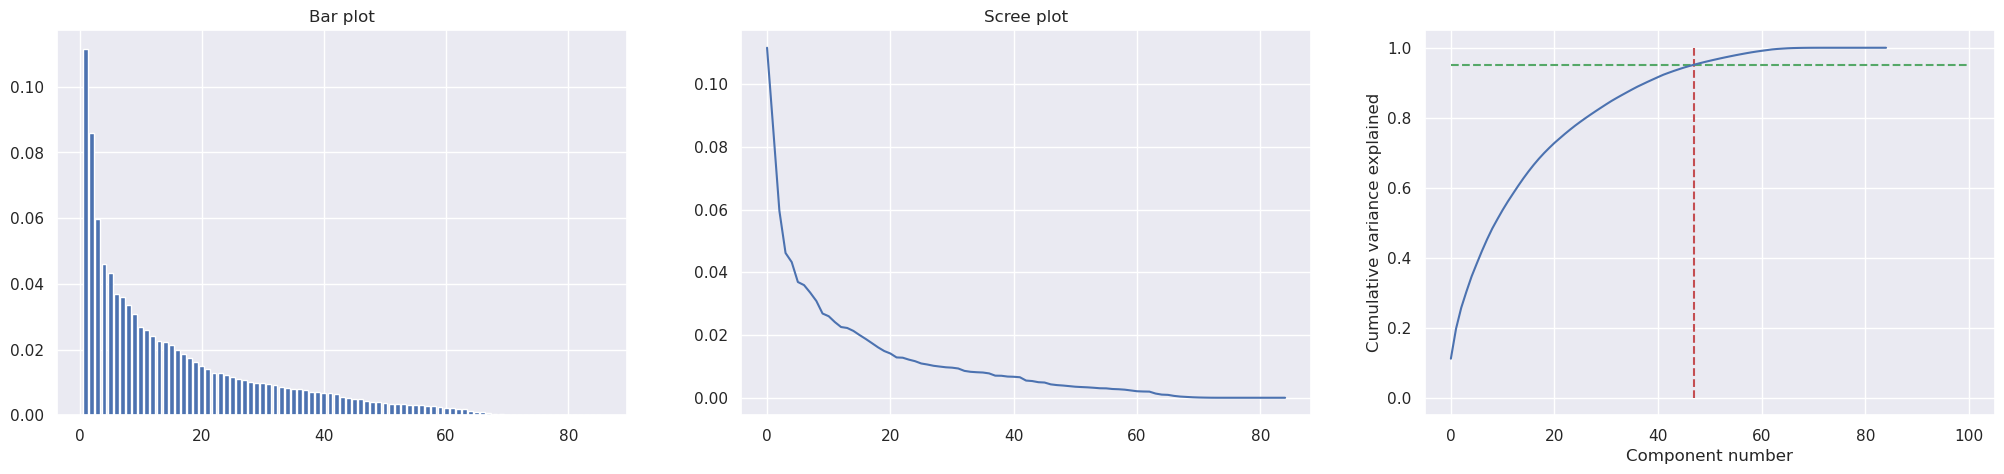

In [63]:
fig, axs = plt.subplots(1,3, figsize=(25,5))

axs[0].bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Component number')
plt.ylabel('Explained variance ratio')
axs[0].set_title('Bar plot')

# plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
axs[1].plot(pca.explained_variance_ratio_)
plt.xlabel('Component number')
plt.ylabel('Explained variance ratio')
axs[1].set_title('Scree plot')

var_cumu = np.cumsum(pca.explained_variance_ratio_) 
axs[2].vlines(x=47, ymax=1, ymin=0, colors="r", linestyles="--")
axs[2].hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
axs[2].plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show();

#### Incremental PCA

In [64]:
pca_incremental = IncrementalPCA(n_components=45)
pca_incremental.fit(X_train)

# Retrieve the principal components
principal_components = pca_incremental.components_
feature_names = X.columns

# Calculate the overall importance of each feature
feature_importance = {}
for i, component in enumerate(principal_components):
    for j, weight in enumerate(component):
        if feature_names[j] not in feature_importance:
            feature_importance[feature_names[j]] = 0.0
        feature_importance[feature_names[j]] += abs(weight)

# Sort features by their overall importance
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importance
for feature, importance in sorted_feature_importance[:10]:
    print(f"{feature}: {importance}")

df_train_pca = pca_incremental.fit_transform(X_train)
df_train_pca.shape

df_test_pca = pca_incremental.transform(X_test)
df_test_pca.shape

IncrementalPCA(n_components=45)

monthly_2g_action_phase: 4.626584948168216
sachet_2g_action_phase: 4.618191985010747
date_of_last_rech_good_phase: 4.598139846394117
sachet_2g_good_phase: 4.4198238867581505
loc_og_t2f_mou_action_phase: 4.381175401053642
vol_2g_mb_good_phase: 4.342932030138032
vol_2g_mb_action_phase: 4.33536117857325
total_rech_num_good_phase: 4.293340689545819
monthly_2g_good_phase: 4.218691001532866
date_of_last_rech_action_phase: 4.154354632288149


(38306, 45)

(9004, 45)

#### LogisticRegressionClassifier using PCA

In [65]:
### LogisticRegressionClassifier
lr_pca = LogisticRegression()

lr_pca.fit(df_train_pca, y_train)
lr_pca_y_prob = lr_pca.predict_proba(df_test_pca)[:,1]
lr_pca_y_pred = lr_pca.predict(df_test_pca)

metrics_df, accuracy, roc_score, precision,recall, f1_sc = generate_metrics(y_test, yt_pred=lr_pca_y_pred, yt_prob=lr_pca_y_prob)
metrics_df
print ('\n classification report:\n', classification_report(y_test,lr_pca_y_pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, lr_pca_y_pred))

overall_summary_df = generate_summary_report(df=overall_summary_df, model_name="LogisticRegressionPCA", accuracy=accuracy, roc_score=roc_score, 
                                             precision=precision, recall=recall, f1_score=f1_sc , step='add')

LogisticRegression()

,accuracy,roc_score,precision,recall,f1_score
0,0.825,0.892,0.315,0.839,0.458



 classification report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.90      8210
           1       0.31      0.84      0.46       794

    accuracy                           0.82      9004
   macro avg       0.65      0.83      0.68      9004
weighted avg       0.92      0.82      0.86      9004


 confusion matrix:
 [[6761 1449]
 [ 128  666]]


#### DecisionTreeClassifier using PCA

In [66]:
### DecisionTreeClassifier
dtc_pca = DecisionTreeClassifier(random_state=100)
dtc_pca.fit(df_train_pca, y_train)

# Get feature importance
dtc_pca_feature_importances = dtc_pca.feature_importances_
dtc_pca_feature_imp_df = pd.DataFrame({'principal_component': range(len(dtc_pca_feature_importances)), 'imp_score': dtc_pca_feature_importances})
dtc_pca_feature_imp_df.sort_values(by='imp_score', ascending=False).head(5)

dtc_pca_y_prob = dtc_pca.predict_proba(df_test_pca)[:,1]
dtc_pca_y_pred = dtc_pca.predict(df_test_pca)

metrics_df, accuracy, roc_score, precision, recall, f1_sc = generate_metrics(y_test, yt_pred=dtc_pca_y_pred, yt_prob=dtc_pca_y_prob)
metrics_df
print ('\n classification report:\n', classification_report(y_test, dtc_pca_y_pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, dtc_pca_y_pred))

overall_summary_df = generate_summary_report(df=overall_summary_df, model_name="DecisionTreeClassifierPCA", accuracy=accuracy, roc_score=roc_score, 
                                             precision=precision, recall=recall, f1_score=f1_sc , step='add')

DecisionTreeClassifier(random_state=100)

,principal_component,imp_score
0,0,0.293
7,7,0.109
4,4,0.055
1,1,0.028
8,8,0.027


,accuracy,roc_score,precision,recall,f1_score
0,0.895,0.655,0.398,0.364,0.380



 classification report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      8210
           1       0.40      0.36      0.38       794

    accuracy                           0.90      9004
   macro avg       0.67      0.66      0.66      9004
weighted avg       0.89      0.90      0.89      9004


 confusion matrix:
 [[7772  438]
 [ 505  289]]


#### RandomForestClassifier using PCA

In [67]:
### RandomForestClassifier
rf_pca = RandomForestClassifier(random_state=100, n_estimators=100)
rf_pca.fit(df_train_pca, y_train)

# Get feature importance
rf_pca_feature_importances = rf_pca.feature_importances_
rf_pca_feature_imp_df = pd.DataFrame({'principal_component': range(len(rf_pca_feature_importances)), 'imp_score': rf_pca_feature_importances})
rf_pca_feature_imp_df.sort_values(by='imp_score', ascending=False).head(5)

rf_pca_y_prob = rf_pca.predict_proba(df_test_pca)[:,1]
rf_pca_y_pred = rf_pca.predict(df_test_pca)

metrics_df, accuracy, roc_score, precision, recall, f1_sc = generate_metrics(y_test, yt_pred=rf_pca_y_pred, yt_prob=rf_pca_y_prob)
metrics_df
print ('\n classification report:\n', classification_report(y_test, rf_pca_y_pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, rf_pca_y_pred))

overall_summary_df = generate_summary_report(df=overall_summary_df, model_name="RandomForestClassifierPCA", accuracy=accuracy, roc_score=roc_score, 
                                             precision=precision, recall=recall, f1_score=f1_sc , step='add')

RandomForestClassifier(random_state=100)

,principal_component,imp_score
0,0,0.135
7,7,0.091
8,8,0.046
4,4,0.045
3,3,0.037


,accuracy,roc_score,precision,recall,f1_score
0,0.923,0.904,0.607,0.370,0.460



 classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      8210
           1       0.61      0.37      0.46       794

    accuracy                           0.92      9004
   macro avg       0.77      0.67      0.71      9004
weighted avg       0.91      0.92      0.91      9004


 confusion matrix:
 [[8020  190]
 [ 500  294]]


#### GradientBosstingClassifier using PCA

In [68]:
### GradientBosstingClassifier
gbc_pca = GradientBoostingClassifier(random_state=100)
gbc_pca.fit(df_train_pca, y_train)

# Get feature importance
gbc_pca_feature_importances = gbc_pca.feature_importances_
gbc_pca_feature_imp_df = pd.DataFrame({'principal_component': range(len(gbc_pca_feature_importances)), 'imp_score': gbc_pca_feature_importances})
gbc_pca_feature_imp_df.sort_values(by='imp_score', ascending=False).head(5)

gbc_pca_y_prob = gbc_pca.predict_proba(df_test_pca)[:,1]
gbc_pca_y_pred = gbc_pca.predict(df_test_pca)

metrics_df, accuracy, roc_score, precision, recall, f1_sc = generate_metrics(y_test, yt_pred=gbc_pca_y_pred, yt_prob=gbc_pca_y_prob)
metrics_df
print ('\n classification report:\n', classification_report(y_test, gbc_pca_y_pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, gbc_pca_y_pred))

overall_summary_df = generate_summary_report(df=overall_summary_df, model_name="GradientBoostingClassifierPCA", accuracy=accuracy, roc_score=roc_score, 
                                             precision=precision, recall=recall, f1_score=f1_sc , step='add')

GradientBoostingClassifier(random_state=100)

,principal_component,imp_score
0,0,0.459
7,7,0.161
4,4,0.098
8,8,0.044
1,1,0.034


,accuracy,roc_score,precision,recall,f1_score
0,0.874,0.906,0.395,0.814,0.532



 classification report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93      8210
           1       0.40      0.81      0.53       794

    accuracy                           0.87      9004
   macro avg       0.69      0.85      0.73      9004
weighted avg       0.93      0.87      0.89      9004


 confusion matrix:
 [[7221  989]
 [ 148  646]]


#### XGBoostClassifier using PCA

In [69]:
### XGBoostClassifier
xgb_pca =  xgb.XGBClassifier(scale_pos_weight= 1, objective = 'binary:logistic', random_state= 100)
xgb_pca.fit(df_train_pca, y_train)

# Get feature importance
xgb_pca_feature_importances = xgb_pca.feature_importances_
xgb_pca_feature_imp_df = pd.DataFrame({'principal_component': range(len(xgb_pca_feature_importances)), 'imp_score': xgb_pca_feature_importances})
xgb_pca_feature_imp_df.sort_values(by='imp_score', ascending=False).head(5)

xgb_y_prob = xgb_pca.predict_proba(df_test_pca)[:,1]
xgb_y_pred = xgb_pca.predict(df_test_pca)

metrics_df, accuracy, roc_score, precision, recall, f1_sc = generate_metrics(y_test, yt_pred=xgb_y_pred, yt_prob=xgb_y_prob)
metrics_df
print ('\n classification report:\n', classification_report(y_test, xgb_y_pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, xgb_y_pred)) 

overall_summary_df = generate_summary_report(df=overall_summary_df, model_name="XGBClassifierPCA", accuracy=accuracy, roc_score=roc_score, 
                                             precision=precision, recall=recall, f1_score=f1_sc , step='add')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

,principal_component,imp_score
0,0,0.155
7,7,0.079
4,4,0.061
8,8,0.034
1,1,0.032


,accuracy,roc_score,precision,recall,f1_score
0,0.921,0.896,0.551,0.567,0.559



 classification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      8210
           1       0.55      0.57      0.56       794

    accuracy                           0.92      9004
   macro avg       0.75      0.76      0.76      9004
weighted avg       0.92      0.92      0.92      9004


 confusion matrix:
 [[7844  366]
 [ 344  450]]


#### LightGBM Classifier using PCA

In [70]:
### LightGBM Classifier
lgbm_pca = LGBMClassifier()
lgbm_pca.fit(df_train_pca, y_train)

# Get feature importance
lgbm_pca_feature_importances = lgbm_pca.feature_importances_
lgbm_pca_feature_imp_df = pd.DataFrame({'principal_component': range(len(lgbm_pca_feature_importances)), 'imp_score': lgbm_pca_feature_importances})
lgbm_pca_feature_imp_df.sort_values(by='imp_score', ascending=False).head(15)

lgbm_y_prob = lgbm_pca.predict_proba(df_test_pca)[:,1]
lgbm_y_pred = lgbm_pca.predict(df_test_pca)

metrics_df, accuracy, roc_score, precision, recall, f1_sc = generate_metrics(y_test, yt_pred=lgbm_y_pred, yt_prob=lgbm_y_prob)
metrics_df
print ('\n classification report:\n', classification_report(y_test, lgbm_y_pred))
print ('\n confusion matrix:\n',confusion_matrix(y_test, lgbm_y_pred)) 

overall_summary_df = generate_summary_report(df=overall_summary_df, model_name="LGBMClassifierPCA", accuracy=accuracy, roc_score=roc_score, 
                                             precision=precision, recall=recall, f1_score=f1_sc , step='add')

[LightGBM] [Info] Number of positive: 19153, number of negative: 19153
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11475
[LightGBM] [Info] Number of data points in the train set: 38306, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

,principal_component,imp_score
0,0,197
7,7,123
8,8,113
4,4,104
1,1,99
23,23,91
25,25,91
2,2,80
41,41,79
26,26,75


,accuracy,roc_score,precision,recall,f1_score
0,0.898,0.909,0.454,0.756,0.567



 classification report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      8210
           1       0.45      0.76      0.57       794

    accuracy                           0.90      9004
   macro avg       0.71      0.83      0.75      9004
weighted avg       0.93      0.90      0.91      9004


 confusion matrix:
 [[7488  722]
 [ 194  600]]


### ----------------------------------

In [71]:
overall_summary_df 

,model_name,accuracy,roc_score,precision,recall,f1_score
0,LogisticRegression,0.822,0.862,0.301,0.770,0.433
1,DecisionTreeClassifier,0.876,0.885,0.393,0.747,0.515
2,RandomForestClassifier,0.939,0.941,0.713,0.515,0.598
3,GradientBoostingClassifier,0.903,0.947,0.472,0.863,0.611
4,XGBClassifier,0.937,0.940,0.627,0.693,0.658
5,LGBMClassifier,0.926,0.950,0.553,0.821,0.661
6,LogisticRegressionPCA,0.825,0.892,0.315,0.839,0.458
7,DecisionTreeClassifierPCA,0.895,0.655,0.398,0.364,0.380
8,RandomForestClassifierPCA,0.923,0.904,0.607,0.370,0.460
9,GradientBoostingClassifierPCA,0.874,0.906,0.395,0.814,0.532


<Axes: xlabel='model_name'>

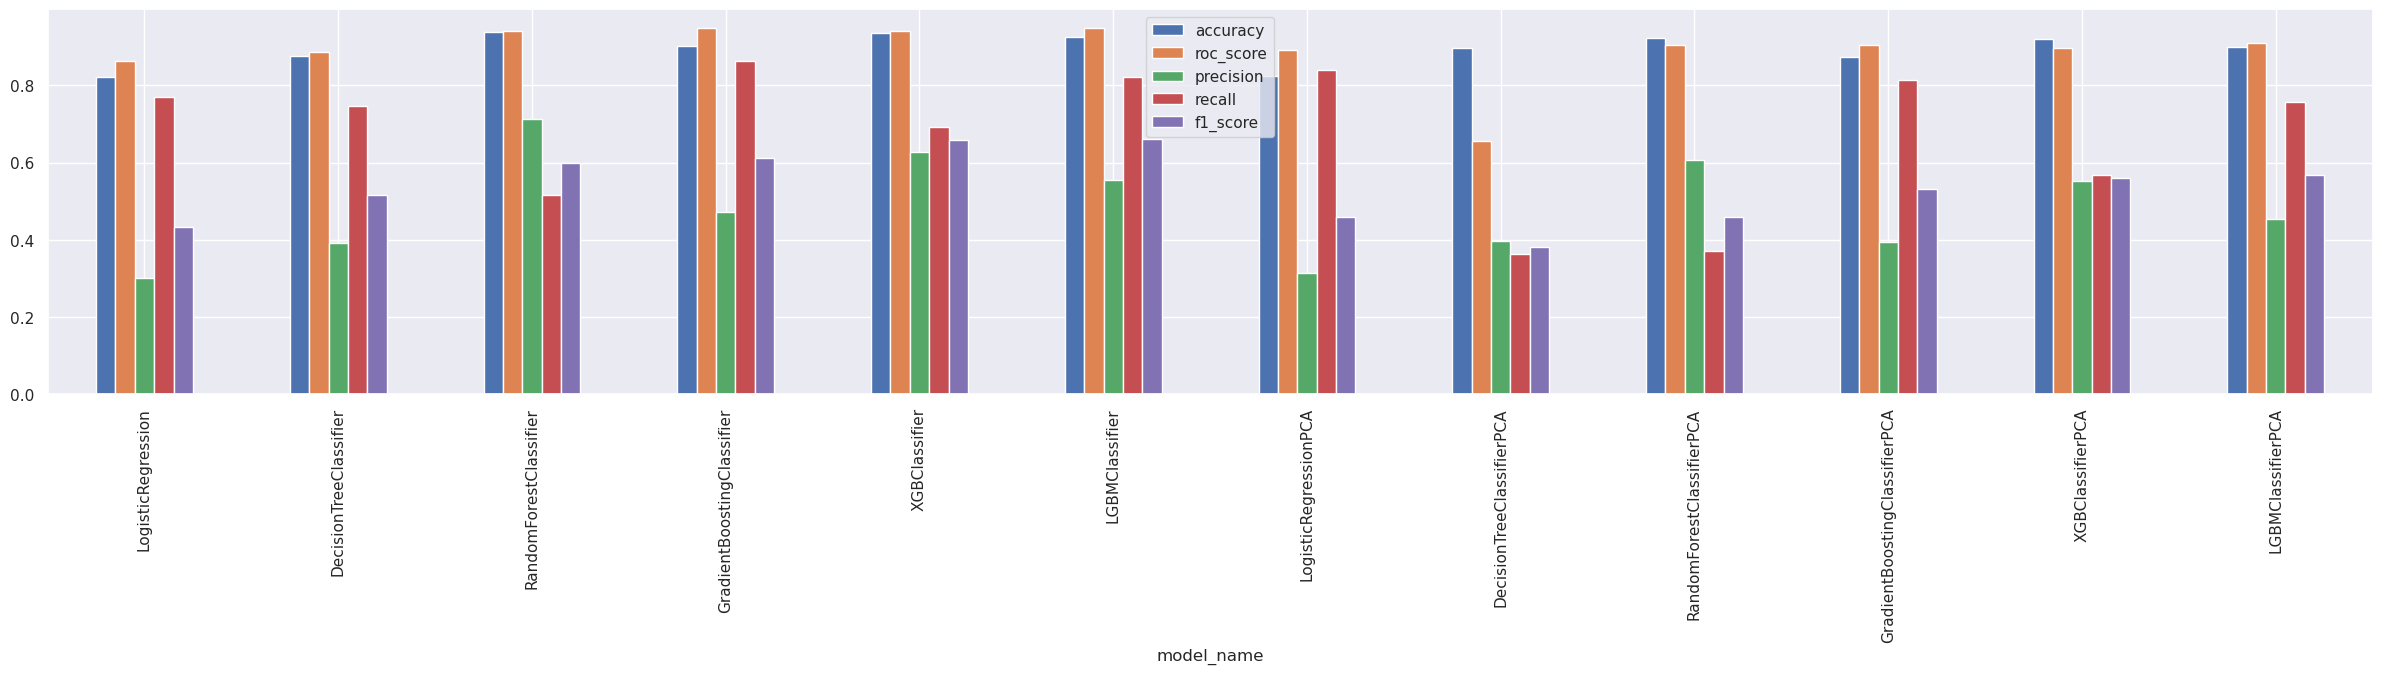

In [73]:
overall_summary_df.set_index('model_name').plot.bar(figsize=(30,5))

In [74]:
overall_summary_df.T

,0,1,2,3,4,5,6,7,8,9,10,11
model_name,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,XGBClassifier,LGBMClassifier,LogisticRegressionPCA,DecisionTreeClassifierPCA,RandomForestClassifierPCA,GradientBoostingClassifierPCA,XGBClassifierPCA,LGBMClassifierPCA
accuracy,0.822,0.876,0.939,0.903,0.937,0.926,0.825,0.895,0.923,0.874,0.921,0.898
roc_score,0.862,0.885,0.941,0.947,0.940,0.950,0.892,0.655,0.904,0.906,0.896,0.909
precision,0.301,0.393,0.713,0.472,0.627,0.553,0.315,0.398,0.607,0.395,0.551,0.454
recall,0.770,0.747,0.515,0.863,0.693,0.821,0.839,0.364,0.370,0.814,0.567,0.756
f1_score,0.433,0.515,0.598,0.611,0.658,0.661,0.458,0.380,0.460,0.532,0.559,0.567
